# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/final.csv


,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.39282,0.03316,0.00002,0.80153,0.00009,0.00037,0.00096,0.00680,0.00000,...,40,1,tcp,none,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:35:59.65674Z
1,1.00000,0.39394,0.03317,0.00003,0.80177,0.00009,0.00042,0.00096,0.00680,0.00001,...,141,2,tcp,none,RSTR,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:35:59.659567Z
2,1.00000,0.62823,0.52613,0.03557,0.80557,0.00315,0.00774,0.01248,0.00680,0.01245,...,91820,54,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:50:46.362101Z
3,1.00000,0.30051,0.62972,0.03261,0.80573,0.00242,0.00537,0.00832,0.00680,0.00750,...,55543,36,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:53:52.704343Z
4,1.00000,0.74686,0.07906,0.00000,0.75277,0.00160,0.00236,0.00416,0.00207,0.00000,...,0,0,udp,dns,S0,orig_reg_or_dyn,resp_well_known,No,No,2017-07-07T16:37:22.211056Z


In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,...,r_ip_bytes,connection.resp_pkts.1,protocol,service,conn_state,orig_p_cat,resp_p_cat,attacker_label,victim_label,timestamp
0,1.00000,0.74686,0.11605,0.00000,0.89478,0.00022,0.00034,0.00064,0.00077,0.00002,...,178,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:38:28.753204Z
1,1.00000,0.18508,0.18576,0.01225,0.84088,0.00351,0.00437,0.00352,0.00680,0.00056,...,4391,9,tcp,ssl,SF,orig_reg_or_dyn,resp_443,No,No,2017-07-07T16:40:34.134591Z
2,1.00000,0.74686,0.36014,0.00000,0.64702,0.00016,0.00028,0.00064,0.00077,0.00003,...,260,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:45:47.805799Z
3,1.00000,0.74686,0.67159,0.00004,0.94169,0.00032,0.00056,0.00128,0.00077,0.00004,...,332,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:55:08.011128Z
4,1.00000,0.74686,0.80535,0.00007,0.97874,0.00018,0.00030,0.00064,0.00077,0.00001,...,160,2,udp,dns,SF,orig_reg_or_dyn,resp_53,No,No,2017-07-07T16:59:08.609778Z


## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 20719 rows and 293 columns


In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          3
orig_orig_connection.service_mode           4
orig_orig_connection.conn_state_mode        4
orig_resp_connection.protocol_mode          3
orig_resp_connection.service_mode           5
orig_resp_connection.conn_state_mode        4
resp_orig_connection.protocol_mode          4
resp_orig_connection.service_mode           4
resp_orig_connection.conn_state_mode        3
resp_resp_connection.protocol_mode          2
resp_resp_connection.service_mode           7
resp_resp_connection.conn_state_mode        9
uid                                     20719
originated_ip                              15
responded_ip                             1509
protocol                                    3
service                                    15
conn_state                                 10
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

,originated_ip_num,responded_ip_num,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_ip_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_ip_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,resp_orig_similar_ssl_validation_status_count,resp_orig_similar_files_source_count,resp_orig_similar_file_md5_count,resp_resp_total,resp_resp_connection.time_mean,resp_resp_connect

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.1160537208118313, 2.159029059978224e-07, 0.8947826219651767,
        ..., 'udp', 'dns', 'SF'],
       [0.1857591569123001, 0.0122498006377176, 0.8408844668935312, ...,
        'tcp', 'ssl', 'SF'],
       [0.3601437993471689, 2.8078564458591804e-07, 0.6470220201126184,
        ..., 'udp', 'dns', 'SF'],
       ...,
       [0.7872616020550174, 8.295481862307524e-05, 0.8044894782621964,
        ..., 'udp', 'dns', 'SF'],
       [0.7356353305554473, 3.405560708438088e-05, 0.9491690955425676,
        ..., 'udp', 'dns', 'SF'],
       [0.2520837855404046, 3.4293883348513604e-05, 0.9185728891669592,
        ..., 'udp', 'dns', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 01:03:44.
Cluster initiation:  1 (01:04:02), gamma: 0.11268371157160506
Cluster initiation:  2 (01:04:35), gamma: 0.11268371157160506
Cluster initiation:  3 (01:05:15), gamma: 0.11268371157160506
Cluster initiation:  4 (01:06:14), gamma: 0.11268371157160506
Cluster initiation:  5 (01:07:31), gamma: 0.11268371157160506
Cluster initiation:  6 (01:08:34), gamma: 0.11268371157160506
Cluster initiation:  7 (01:09:44), gamma: 0.11268371157160506
Done at 01:09:44.


In [18]:
print_info

['Cluster initiation:  1 (01:04:02), gamma: 0.11268371157160506',
 'Cluster initiation:  2 (01:04:35), gamma: 0.11268371157160506',
 'Cluster initiation:  3 (01:05:15), gamma: 0.11268371157160506',
 'Cluster initiation:  4 (01:06:14), gamma: 0.11268371157160506',
 'Cluster initiation:  5 (01:07:31), gamma: 0.11268371157160506',
 'Cluster initiation:  6 (01:08:34), gamma: 0.11268371157160506',
 'Cluster initiation:  7 (01:09:44), gamma: 0.11268371157160506']

In [19]:
cost

[106049.30190919829,
 73792.2928597712,
 49994.23151689291,
 43835.371546679424,
 37847.9890652356,
 34694.7941210506,
 32465.385377093775]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

,Cluster,Cost
0,1,106049.30191
1,2,73792.29286
2,3,49994.23152
3,4,43835.37155
4,5,37847.98907
5,6,34694.79412
6,7,32465.38538


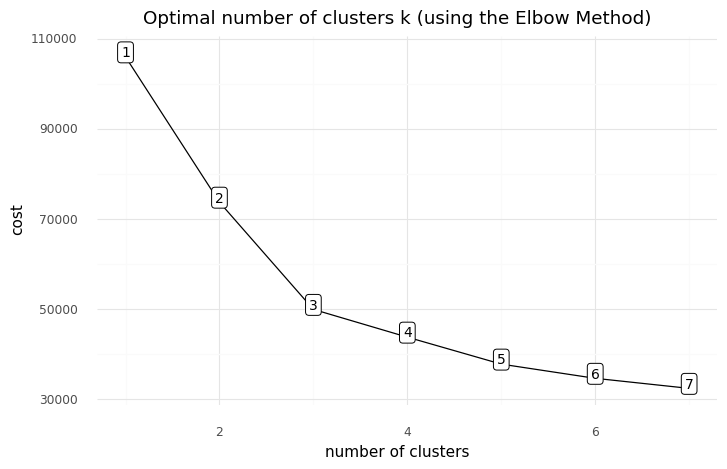

<ggplot: (8750589464543)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [23]:
# Fit the cluster
OPTIMAL_K = 2

kprototype = computed_clusters[OPTIMAL_K]

In [24]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.40728172800699336', '0.0009273689664025713',
        '0.7695113916875677', '0.00030175902352855185',
        '0.0008444855178630589', '0.001366131045400018',
        '3.709007955594829e-05', '0.000706974218128826',
        '0.9812915586611067', '7.507424938297012e-19', '0.0', '0.0',
        '-6.647199164117147e-20', '0.35670559323943857',
        '0.38906401453103096', '0.4245813497615404',
        '0.46075142008072856', '0.3804898003142599',
        '0.3085905322048774', '0.4601094969215258', '0.1480175814267818',
        '0.3559960159029507', '0.025985735215980948',
        '0.055165987250982075', '0.3346676907622669',
        '0.2644147162332233', '0.10327961230698449',
        '0.36842141795234457', '0.0', '0.10690744320860385',
        '0.3843880311056029', '0.1406138472519603', '0.5607647761078173',
        '0.07040940846884985', '0.21982965200767832',
        '0.22320440862591864', '0.37712524661596986',
        '0.0022822044404372777', '0.0', '0.0', '0.0', '0.0', '0.

In [25]:
# Check the iteration of the clusters created
kprototype.n_iter_

5

In [26]:
# Check the cost of the clusters created
kprototype.cost_

49994.23151689291

In [28]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [29]:
df.head()

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [30]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [31]:
df['cluster'].value_counts()

0    8873
2    7774
1    4072
Name: cluster, dtype: int64

## 2. Results

In [32]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

,cluster_cat,cluster,protocol,service,conn_state,orig_p_cat,resp_p_cat,connection.time,connection.duration,connection.orig_bytes,connection.orig_pkts,connection.resp_bytes,connection.resp_pkts,dns_count,ssh_count,http_count,ssl_count,files_count
0,0,8873,udp,dns,SF,orig_reg_or_dyn,resp_53,0.40728,0.00093,0.00030,0.00084,0.00004,0.00071,0.98129,0.00000,0.00000,0.00000,0.00000
1,1,4072,udp,dns,SF,orig_reg_or_dyn,resp_53,0.42232,0.00024,0.00018,0.00040,0.00002,0.00032,0.99681,0.00000,0.00000,0.00147,0.00008
2,2,7774,tcp,ssl,SF,orig_reg_or_dyn,resp_443,0.35884,0.04450,0.00478,0.00592,0.00272,0.00635,0.01042,0.00836,0.28158,0.42732,0.03501


In [33]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

,cluster_cat,cluster,orig_orig_total,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean
0,0,8873,0.35671,udp,dns,SF,0.38906,0.42458,0.38049,0.46075,0.30859,0.46011
1,1,4072,0.37584,udp,dns,SF,0.40697,0.00506,0.02908,0.00857,0.00464,0.04506
2,2,7774,0.35897,udp,dns,SF,0.34334,0.44600,0.43238,0.47618,0.32813,0.48487


In [34]:
pd.DataFrame(kprototype.cluster_centroids_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181
0,0.40728172800699336,0.0009273689664025713,0.7695113916875677,0.00030175902352855185,0.0008444855178630589,0.001366131045400018,3.709007955594829e-05,0.000706974218128826,0.9812915586611067,7.507424938297012e-19,0.0,0.0,-6.647199164117147e-20,0.35670559323943857,0.38906401453103096,0.4245813497615404,0.46075142008072856,0.3804898003142599,0.3085905322048774,0.4601094969215258,0.1480175814267818,0.3559960159029507,0.025985735215980948,0.055165987250982075,0.3346676907622669,0.2644147162332233,0.10327961230698449,0.36842141795234457,0.0,0.10690744320860385,0.3843880311056029,0.1406138472519603,0.5607647761078173,0.07040940846884985,0.21982965200767832,0.22320440862591864,0.37712524661596986,0.0022822044404372777,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0009577878972595278,0.40677382059580536,0.004161801410873684,0.022049773572680228,0.020289149716988645,0.027332464068059916,0.022642922196339652,0.025261225869813747,0.0008823113818168247,0.011041522435639446,0.013536358402807131,1.4829138664309793e-05,0.007596782373492618,0.0,0.007705634286403231,0.0,0.014751010288032726,0.016379277959352335,0.011202524512566208,0.05156312546415469,0.01603629848443204,0.0,0.0,0.017828077492927717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7370184987938416,0.4050455969165734,0.006326415766897145,0.07388690744068907,0.03834824255062915,0.023477981386671815,0.09376274120892734,0.3228544460723543,0.7356961391385075,0.0,0.0,0.7326274073114701,0.0,0.00017417497412988792,0.004953849150555854,0.0,0.32327707652428717,0.26397332290291914,0.0,0.9979543330586165,0.0,0.0,0.0018231767560056014,0.001823176756005609,0.013502593332390017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5853993770501948,0.40843051850310724,0.0010942874049652068,0.0019181684148295002,0.0012082720405519516,0.00013476117813180508,0.0023676491404138245,0.3513826419269952,0.5856865053559153,0.00032558197778530143,0.00037666012207345916,0.5815218576979915,1.8665439945608476e-05,0.5593091400879071,0.0002638238578732932,0.0,0.41335136556593355,0.040390054365030896,0.10431646568240514,0.9806324544052412,0.00032386824747097475,-6.0591175439505475e-18,-1.423908263297e-17,2.090692013198756e-06,0.010581861506013366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,orig_reg_or_dyn,resp_53,udp,dns,SF,udp,dns,SF,-,-,-,udp,dns,SF,udp,dns,SF
1,0.42231623141970426,0.000240351390901281,0.9301640603875602,0.00017775757991671682,0.0003982711198429622,0.0011737465966144686,1.9113791395061542e-05,0.0003198120952794809,0.9968074656188605,0.0,0.0,0.0014734774066797642,7.556294393229548e-05,0.3758376760680407,0.40696782781930396,0.005060734950509829,0.008566393256063398,0.029082196599997646,0.004640353533602257,0.04506005933807923,0.21333005893912166,0.37463954897225715,-8.189377330602769e-16,6.068805685013557e-16,0.6319266808136629,7.851185065125959e-15,7.367387032927218e-05,0.003680907362769677,0.0,0.13678152234146937,0.11998403732810245,1.1314623108771948e-15,0.997929690499325,1.202296284796059e-15,-9.144305115015555e-15,0.001704020074682773,0.0018042565496767728,0.10938402866057927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5836324965308248,0.4215750560464492,0.27535114364132296,0.09261484427961032,0.04374798880654813,0.16291756330990695,0.08463731145678723,0.5706567499298334,0.5836727938805166,6.314903171487223e-05,9.292199861944408e-05,0.5794031474

In [35]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

,connection.time,connection.duration,connection.orig_p,connection.orig_bytes,connection.orig_pkts,connection.resp_p,connection.resp_bytes,connection.resp_pkts,orig_p_cat,resp_p_cat,protocol,service,conn_state,dns_count,ssh_count,http_count,ssl_count,files_count,orig_orig_total,orig_orig_connection.time_mean,orig_orig_connection.duration_mean,orig_orig_connection.orig_pkts_mean,orig_orig_connection.orig_bytes_mean,orig_orig_connection.resp_bytes_mean,orig_orig_connection.resp_pkts_mean,orig_orig_orig_p_well_known_count,orig_orig_orig_p_reg_or_dyn_count,orig_orig_resp_p_21_count,orig_orig_resp_p_22_count,orig_orig_resp_p_53_count,orig_orig_resp_p_80_count,orig_orig_resp_p_123_count,orig_orig_resp_p_443_count,orig_orig_resp_p_3389_count,orig_orig_resp_p_well_known_count,orig_orig_resp_p_reg_count,orig_orig_resp_p_dyn_count,orig_orig_dns_count_mean,orig_orig_ssh_count_mean,orig_orig_http_count_mean,orig_orig_ssl_count_mean,orig_orig_files_count_mean,orig_orig_similar_conns_count,orig_orig_similar_dns_qtype_count,orig_orig_similar_dns_rcode_count,orig_orig_similar_ssh_auth_attempts_count,orig_orig_similar_ssh_host_key_count,orig_orig_similar_http_method_count,orig_orig_similar_http_status_code_count,orig_orig_similar_http_user_agent_count,orig_orig_similar_ssl_version_count,orig_orig_similar_ssl_cipher_count,orig_orig_similar_ssl_curve_count,orig_orig_similar_ssl_validation_status_count,orig_orig_similar_files_source_count,orig_orig_similar_file_md5_count,orig_orig_connection.protocol_mode,orig_orig_connection.service_mode,orig_orig_connection.conn_state_mode,orig_resp_total,orig_resp_connection.time_mean,orig_resp_connection.duration_mean,orig_resp_connection.orig_pkts_mean,orig_resp_connection.orig_bytes_mean,orig_resp_connection.resp_bytes_mean,orig_resp_connection.resp_pkts_mean,orig_resp_orig_p_well_known_count,orig_resp_orig_p_reg_or_dyn_count,orig_resp_resp_p_21_count,orig_resp_resp_p_22_count,orig_resp_resp_p_53_count,orig_resp_resp_p_80_count,orig_resp_resp_p_123_count,orig_resp_resp_p_443_count,orig_resp_resp_p_3389_count,orig_resp_resp_p_well_known_count,orig_resp_resp_p_reg_count,orig_resp_resp_p_dyn_count,orig_resp_dns_count_mean,orig_resp_ssh_count_mean,orig_resp_http_count_mean,orig_resp_ssl_count_mean,orig_resp_files_count_mean,orig_resp_similar_conns_count,orig_resp_similar_dns_qtype_count,orig_resp_similar_dns_rcode_count,orig_resp_similar_ssh_auth_attempts_count,orig_resp_similar_ssh_host_key_count,orig_resp_similar_http_method_count,orig_resp_similar_http_status_code_count,orig_resp_similar_http_user_agent_count,orig_resp_similar_ssl_version_count,orig_resp_similar_ssl_cipher_count,orig_resp_similar_ssl_curve_count,orig_resp_similar_ssl_validation_status_count,orig_resp_similar_files_source_count,orig_resp_similar_file_md5_count,orig_resp_connection.protocol_mode,orig_resp_connection.service_mode,orig_resp_connection.conn_state_mode,resp_orig_total,resp_orig_connection.time_mean,resp_orig_connection.duration_mean,resp_orig_connection.orig_pkts_mean,resp_orig_connection.orig_bytes_mean,resp_orig_connection.resp_bytes_mean,resp_orig_connection.resp_pkts_mean,resp_orig_orig_p_well_known_count,resp_orig_orig_p_reg_or_dyn_count,resp_orig_resp_p_21_count,resp_orig_resp_p_22_count,resp_orig_resp_p_53_count,resp_orig_resp_p_80_count,resp_orig_resp_p_123_count,resp_orig_resp_p_443_count,resp_orig_resp_p_3389_count,resp_orig_resp_p_well_known_count,resp_orig_resp_p_reg_count,resp_orig_resp_p_dyn_count,resp_orig_dns_count_mean,resp_orig_ssh_count_mean,resp_orig_http_count_mean,resp_orig_ssl_count_mean,resp_orig_files_count_mean,resp_orig_similar_conns_count,resp_orig_similar_dns_qtype_count,resp_orig_similar_dns_rcode_count,resp_orig_similar_ssh_auth_attempts_count,resp_orig_similar_ssh_host_key_count,resp_orig_similar_http_method_count,resp_orig_similar_http_status_code_count,resp_orig_similar_http_user_agent_count,resp_orig_similar_ssl_version_count,resp_orig_similar_ssl_cipher_count,resp_orig_similar_ssl_curve_count,res

In [36]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [37]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 256 principal components: 1.0


In [38]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [0.99999983]
Variance Captured by First  10 Principal Components: [0.90874068]
Variance Captured by First   7 Principal Components: [0.87711171]
Variance Captured by First   5 Principal Components: [0.84247957]
Variance Captured by First   2 Principal Components: [0.75703424]
Variance Captured by the First Principal Component:  [0.61865425]


In [39]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.38266842
Variance of connection.duration                       : 0.23598583
Variance of connection.orig_p                         : 0.08640474
Variance of connection.orig_bytes                     : 0.05197525
Variance of connection.orig_pkts                      : 0.03253360
Variance of connection.resp_p                         : 0.02857458
Variance of connection.resp_bytes                     : 0.02433716
Variance of connection.resp_pkts                      : 0.01939042
Variance of orig_p_cat                                : 0.01524173
Variance of resp_p_cat                                : 0.01256765
Variance of protocol                                  : 0.01013201
Variance of service                                   : 0.00892931
Variance of conn_state                                : 0.00789565
Variance of dns_count                                 : 0.00718869
Variance of ssh_count                                 : 0.0066

In [40]:
pca_X['cluster'] = kprototype.labels_
pca_X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,cluster
0,-1.96669,-1.32195,-1.30656,-0.90174,0.38565,0.20808,-0.74415,0.25650,-0.31868,-0.08112,0.12831,0.04419,0.25128,0.25596,0.14141,0.07399,-0.03378,-0.00480,-0.00559,-0.02766,0.01933,0.06384,0.03137,-0.07613,0.08046,0.01374,0.03877,0.00157,0.06437,-0.00191,0.04542,0.00019,0.05066,-0.00871,0.03710,-0.00046,0.03233,0.01361,0.03083,-0.01882,-0.00255,0.01489,-0.00446,-0.14614,-0.16189,-0.02209,-0.03217,0.15295,-0.00233,0.04394,0.02895,0.01420,0.06955,0.00651,-0.02142,0.00072,-0.00608,-0.04941,-0.01803,-0.01560,-0.03361,0.01690,0.01111,0.02829,0.03142,-0.02013,0.01466,-0.00684,0.03808,-0.01886,0.01631,0.00100,-0.01238,0.00498,-0.01458,-0.00366,-0.00860,-0.00604,-0.00056,0.00230,0.00182,0.00691,-0.00808,0.00937,-0.00739,0.00566,-0.00373,0.00785,-0.00575,-0.00471,-0.00507,-0.00209,-0.00621,-0.00849,0.00305,-0.00496,0.00431,0.00111,-0.00182,-0.00331,0.00362,-0.00307,-0.00288,-0.00190,-0.00161,0.00080,0.00268,-0.00945,0.00056,0.00016,-0.00127,0.00199,0.00409,-0.00376,-0.00141,0.00106,0.00271,0.00043,0.00011,-0.00015,-0.00189,0.00114,0.00449,-0.00556,0.00085,-0.00367,0.00055,0.00361,-0.00256,0.00167,-0.00218,0.00007,-0.00076,-0.00129,0.00107,0.00096,0.00025,0.00013,0.00136,-0.00170,-0.00032,-0.00002,0.00053,-0.00057,-0.00012,0.00002,0.00077,-0.00041,0.00041,-0.00112,-0.00012,-0.00031,0.00016,-0.00012,0.00004,0.00020,-0.00011,0.00002,-0.00026,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0
1,2.69186,-0.54099,0.47789,-1.61389,-0.20908,0.33463,-0.74466,0.07826,0.01856,0.29272,-0.38604,0.09547,-0.39379,-0.06594,-0.00744,0.08661,0.02468,-0.08334,0.03089,-0.05354,0.03814,0.10779,-0.03964,0.08240,-0.03675,-0.04097,-0.03815,0.00949,-0.03706,-0.04248,-0.09163,-0.08571,-0.05959,0.08433,-0.03097,0.05784,-0.03225,-0.04782,0.04304,0.04236,0.00965,0.00939,0.02512,-0.03399,-0.01503,-0.01507,0.02052,-0.02842,0.02765,-0.02310,0.06656,0.10003,-0.03959,-0.02387,0.02335,-0.07254,-0.00172,-0.01438,0.05030,-0.05036,-0.05639,-0.01327,0.01361,0.00605,0.00638,-0.05746,0.01789,0.01180,-0.01143,0.02571,0.02246,-0.00138,0.01944,-0.00826,0.01768,0.00146,0.00461,0.01034,0.00844,0.00928,0.00153,0.02576,-0.00662,-0.00707,0.01630,-0.00650,0.01440,0.00299,0.00580,-0.00340,-0.01494,0.00250,0.01058,0.00045,-0.00397,-0.00215,-0.01391,-0.00333,0.00044,-0.00252,0.00421,0.00320,-0.00492,-0.00400,0.00546,-0.0

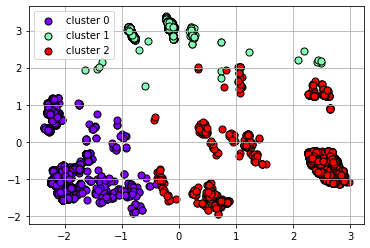

In [41]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [42]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

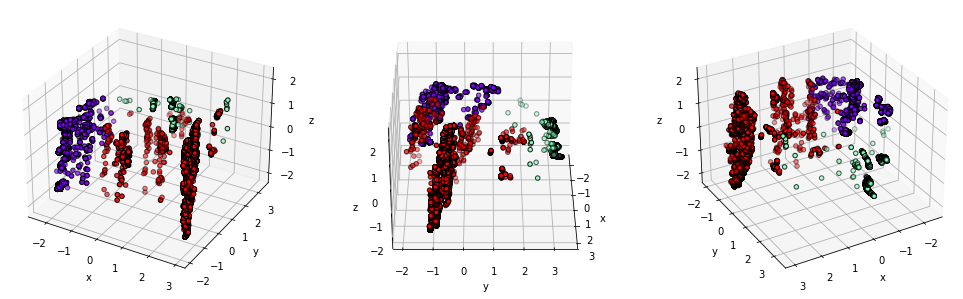

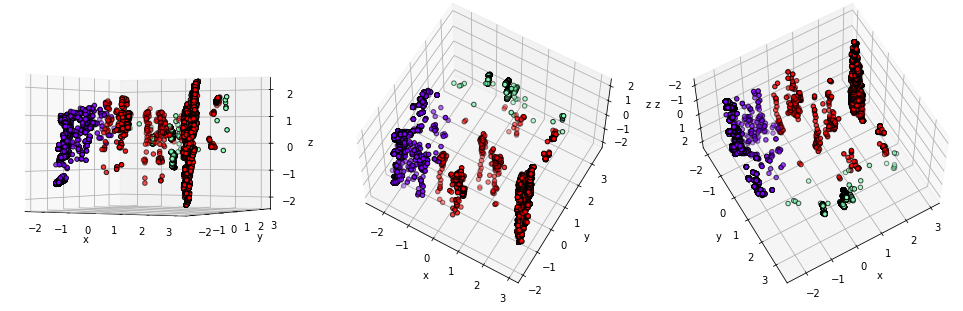

In [43]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [44]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [45]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,cluster,uid,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
0,-1.96669,-1.32195,-1.30656,-0.90174,0.38565,0.20808,-0.74415,0.25650,-0.31868,-0.08112,0.12831,0.04419,0.25128,0.25596,0.14141,0.07399,-0.03378,-0.00480,-0.00559,-0.02766,0.01933,0.06384,0.03137,-0.07613,0.08046,0.01374,0.03877,0.00157,0.06437,-0.00191,0.04542,0.00019,0.05066,-0.00871,0.03710,-0.00046,0.03233,0.01361,0.03083,-0.01882,-0.00255,0.01489,-0.00446,-0.14614,-0.16189,-0.02209,-0.03217,0.15295,-0.00233,0.04394,0.02895,0.01420,0.06955,0.00651,-0.02142,0.00072,-0.00608,-0.04941,-0.01803,-0.01560,-0.03361,0.01690,0.01111,0.02829,0.03142,-0.02013,0.01466,-0.00684,0.03808,-0.01886,0.01631,0.00100,-0.01238,0.00498,-0.01458,-0.00366,-0.00860,-0.00604,-0.00056,0.00230,0.00182,0.00691,-0.00808,0.00937,-0.00739,0.00566,-0.00373,0.00785,-0.00575,-0.00471,-0.00507,-0.00209,-0.00621,-0.00849,0.00305,-0.00496,0.00431,0.00111,-0.00182,-0.00331,0.00362,-0.00307,-0.00288,-0.00190,-0.00161,0.00080,0.00268,-0.00945,0.00056,0.00016,-0.00127,0.00199,0.00409,-0.00376,-0.00141,0.00106,0.00271,0.00043,0.00011,-0.00015,-0.00189,0.00114,0.00449,-0.00556,0.00085,-0.00367,0.00055,0.00361,-0.00256,0.00167,-0.00218,0.00007,-0.00076,-0.00129,0.00107,0.00096,0.00025,0.00013,0.00136,-0.00170,-0.00032,-0.00002,0.00053,-0.00057,-0.00012,0.00002,0.00077,-0.00041,0.00041,-0.00112,-0.00012,-0.00031,0.00016,-0.00012,0.00004,0.00020,-0.00011,0.00002,-0.00026,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0,ChmPmtJLadJ2hr7re,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:38:28.753204Z,0.11605,0.00019,0.00000,udp,dns,SF,0.89478,58639,orig_reg_or_dyn,0.00022,90,0.00064,2,0.00077,53,resp_53,0.00002,122,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1,2.69186,-0.54099,0.47789,-1.61389,-0.20908,0.33463,-0.74466,0.07826,0.01856,0.29272,-0.38604,0.09547,-0.39379,-0.06594,-0.00744,0.08661,0.02468,-0.08334,0.03089,-0.05354,0.03814,0.107

In [47]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [48]:
plt.rcParams["figure.figsize"] = (10,7)

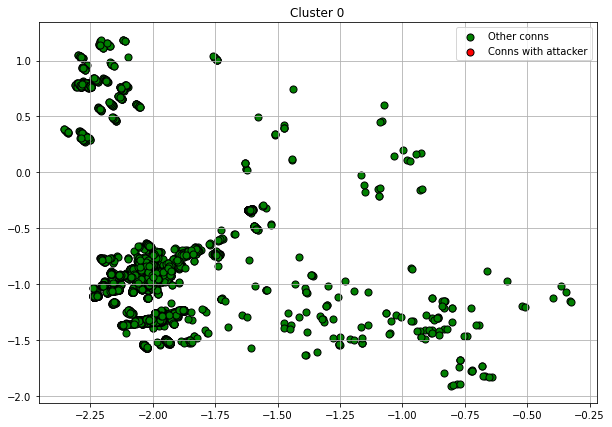

Total num of conns: 8873

Attacker conns ratio:
No    8873
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    3127
192.168.10.15     968
192.168.10.19     821
192.168.10.16     808
192.168.10.9      795
192.168.10.5      710
192.168.10.8      684
192.168.10.17     361
192.168.10.50     275
192.168.10.12     206
192.168.10.25     103
192.168.10.51      14
192.168.10.1        1
Name: originated_ip, dtype: int64

192.168.10.3     8866
192.168.10.50       7
Name: responded_ip, dtype: int64

Cluster 0 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
7597,1.00000,192.168.10.17,0.74686,192.168.10.3,2017-07-07T17:00:29.076218Z,0.85008,0.04767,0.00005,udp,dns,SF,0.21547,14123,orig_reg_or_dyn,0.00026,104,0.00064,2,0.00077,53,resp_53,0.00003,220,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
4297,1.00000,192.168.10.50,0.74686,192.168.10.3,2017-07-07T16:40:31.449689Z,0.18427,0.00019,0.00000,udp,dns,SF,0.21761,14263,orig_reg_or_dyn,0.00020,80,0.00064,2,0.00077,53,resp_53,0.00003,180,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,Yes
11797,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:35:01.352522Z,0.00075,0.06118,0.00007,udp,dns,SF,0.84482,55365,orig_reg_or_dyn,0.00033,136,0.00128,4,0.00077,53,resp_53,0.00010,690,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
5642,1.00000,192.168.10.16,0.74686,192.168.10.3,2017-07-07T16:57:17.727652Z,0.74370,0.06114,0.00007,udp,dns,SF,0.23131,15161,orig_reg_or_dyn,0.00015,60,0.00064,2,0.00077,53,resp_53,0.00005,344,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
3870,1.00000,192.168.10.19,0.74686,192.168.10.3,2017-07-07T16:36:04.122513Z,0.03565,0.02578,0.00003,udp,dns,SF,0.23220,15219,orig_reg_or_dyn,0.00016,64,0.00064,2,0.00077,53,resp_53,0.00004,268,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17888,1.00000,192.168.10.15,0.74686,192.168.10.3,2017-07-07T16:55:03.695656Z,0.66919,0.03125,0.00003,udp,dns,SF,0.81099,53148,orig_reg_or_dyn,0.00033,136,0.00128,4,0.00077,53,resp_53,0.00003,230,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
328,1.00000,192.168.10.5,0.74686,192.168.10.3,2017-07-07T16:46:57.297662Z,0.39878,0.00018,0.00000,udp,dns,SF,0.79431,52055,orig_reg_or_dyn,0.00016,64,0.00064,2,0.00077,53,resp_53,0.00005,340,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
9624,1.00000,192.168.10.14,0.74686,192.168.10.3,2017-07-07T16:45:20.289561Z,0.34485,0.06067,0.00007,udp,dns,SF,0.78633,51532,orig_reg_or_dyn,0.00034,140,0.00128,4,0.00077,53,resp_53,0.00004,290,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
17323,1.00000,192.168.10.15,0.74686,192.168.10.3,2017-07-07T16:39:29.29529Z,0.14971,0.04129,0.00005,udp,dns,SF,0.98923,64828,orig_reg_or_dyn,0.00036,148,0.00128,4,0.00077,53,resp_53,0.00005,388,0.00125,4,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
11671,1.00000,192.168.10.15,0.74686,192.168.10.3,2017-07-07T16:55:02.537697Z,0.66855,0.00021,0.00000,udp,dns,SF,0.85846,56259,orig_reg_or_dyn,0.00020,82,0.00064,2,0.00077,53,resp_53,0.00004,254,0.00062,2,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp     8789
tcp       82
icmp       2
Name: protocol, dtype: int64

Service:
dns                8716
none                 79
krb                  30
ntp                  18
krb_tcp              10
dce_rpc               9
gssapi,krb,smb        8
gssapi,ntlm,smb       2
smb                   1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    8839
orig_well_known      34
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            8699
resp_well_known     131
resp_reg             20
resp_123             18
resp_dyn              5
Name: resp_p_cat, dtype: int64




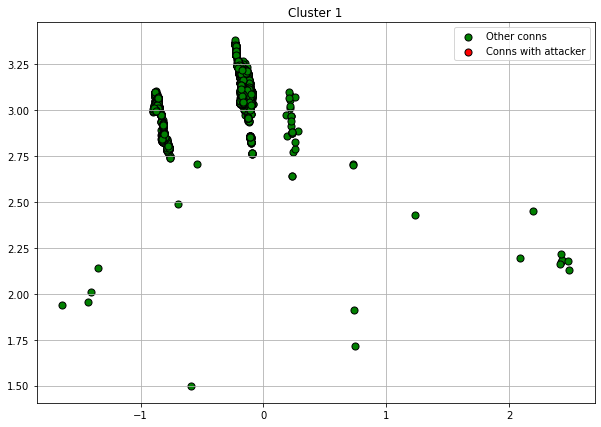

Total num of conns: 4072

Attacker conns ratio:
No    4072
Name: attacker_label, dtype: int64

IPs:
192.168.10.3     4070
192.168.10.50       2
Name: originated_ip, dtype: int64

192.168.10.1      4026
224.0.0.252         19
192.168.10.255      12
65.55.44.109         2
192.168.10.17        1
192.168.10.50        1
192.168.10.16        1
65.55.44.108         1
65.52.108.189        1
64.4.54.253          1
192.168.10.12        1
192.168.10.19        1
65.52.108.254        1
131.253.34.237       1
224.0.1.24           1
192.168.10.51        1
65.52.108.231        1
Name: responded_ip, dtype: int64

Cluster 1 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
9387,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:58:38.580614Z,0.78865,0.03064,0.00003,udp,dns,SF,0.92092,60352,orig_reg_or_dyn,0.00012,47,0.00032,1,0.00077,53,resp_53,0.00002,131,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
1039,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T17:00:19.778986Z,0.84491,0.03079,0.00003,udp,dns,SF,0.95057,62295,orig_reg_or_dyn,0.00014,57,0.00032,1,0.00077,53,resp_53,0.00003,185,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
13066,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:36:49.389052Z,0.06081,0.02314,0.00003,udp,dns,SF,0.95172,62370,orig_reg_or_dyn,0.00016,64,0.00032,1,0.00077,53,resp_53,0.00002,117,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
12203,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:35:24.942159Z,0.01386,0.03085,0.00003,udp,dns,SF,0.94104,61670,orig_reg_or_dyn,0.00012,50,0.00032,1,0.00077,53,resp_53,0.00002,132,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
2274,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:57:15.916137Z,0.74270,0.06053,0.00007,udp,dns,SF,0.91825,60177,orig_reg_or_dyn,0.00015,62,0.00032,1,0.00077,53,resp_53,0.00003,233,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10364,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:58:33.74181Z,0.78596,0.17145,0.00019,udp,dns,SF,0.92436,60577,orig_reg_or_dyn,0.00010,41,0.00032,1,0.00077,53,resp_53,0.00002,135,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
5907,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:38:30.728511Z,0.11715,0.05009,0.00006,udp,dns,SF,0.92042,60319,orig_reg_or_dyn,0.00013,53,0.00032,1,0.00077,53,resp_53,0.00001,69,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
14780,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:55:50.932545Z,0.69545,0.03258,0.00004,udp,dns,SF,0.93974,61585,orig_reg_or_dyn,0.00009,37,0.00032,1,0.00077,53,resp_53,0.00001,85,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
15738,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:57:17.727445Z,0.74370,0.06109,0.00007,udp,dns,SF,0.94990,62251,orig_reg_or_dyn,0.00016,64,0.00032,1,0.00077,53,resp_53,0.00002,157,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No
10056,1.00000,192.168.10.3,0.74686,192.168.10.1,2017-07-07T16:36:13.987731Z,0.04113,0.07166,0.00008,udp,dns,SF,0.94340,61825,orig_reg_or_dyn,0.00011,45,0.00032,1,0.00077,53,resp_53,0.00001,95,0.00031,1,1.00000,0.00000,0.00000,0.00000,0.00000,No,No


Protocol:
udp    4064
tcp       8
Name: protocol, dtype: int64

Service:
dns     4059
none       7
ssl        6
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4052
orig_well_known      20
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4025
resp_well_known      20
resp_reg             19
resp_443              8
Name: resp_p_cat, dtype: int64




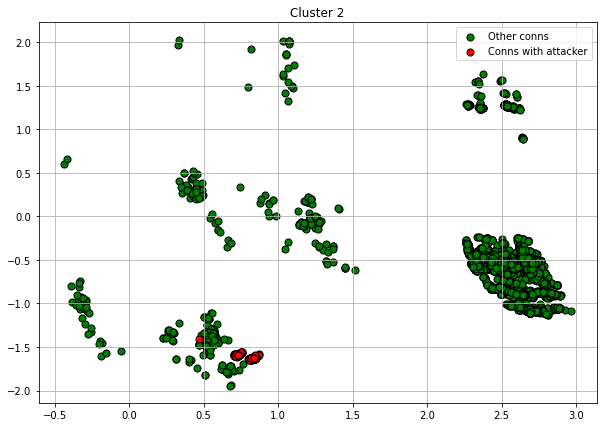

Total num of conns: 7774

Attacker conns ratio:
No     7547
Yes     227
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    2420
192.168.10.19    1103
192.168.10.15     861
192.168.10.16     773
192.168.10.5      600
192.168.10.8      530
192.168.10.9      520
192.168.10.17     255
192.168.10.25     231
172.16.0.1        227
192.168.10.12     187
192.168.10.51      58
192.168.10.50       9
Name: originated_ip, dtype: int64

67.72.99.137       479
192.168.10.50      421
205.174.165.73     363
178.255.83.1       165
162.208.20.178     133
                  ... 
38.106.10.133        1
158.69.125.231       1
35.185.125.158       1
104.16.138.132       1
173.194.207.154      1
Name: responded_ip, Length: 1497, dtype: int64

Cluster 2 NOK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
16570,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:40.938343Z,0.82332,0.00012,0.00000,tcp,none,REJ,0.61801,40502,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
7077,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:04.51046Z,0.80307,0.00009,0.00000,tcp,none,REJ,0.71235,46684,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00682,444,resp_well_known,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
891,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:52.535698Z,0.82977,0.00005,0.00000,tcp,none,REJ,0.76970,50442,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
135,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:08.986516Z,0.83891,0.00012,0.00000,tcp,none,REJ,0.54135,35478,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00682,444,resp_well_known,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9912,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:59:06.43494Z,0.80414,0.00012,0.00000,tcp,none,REJ,0.77101,50528,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00680,443,resp_443,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9844,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:58:59.681806Z,0.80039,0.00012,0.00000,tcp,none,REJ,0.65058,42636,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00682,444,resp_well_known,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9347,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:02.040754Z,0.83505,0.00082,0.00000,tcp,none,RSTO,0.64606,42340,orig_reg_or_dyn,0.00000,0,0.00096,3,0.00029,22,resp_22,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
7037,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:10.426483Z,0.83972,0.00066,0.00000,tcp,none,RSTO,0.76753,50300,orig_reg_or_dyn,0.00000,0,0.00096,3,0.00029,22,resp_22,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
1861,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T16:57:25.263397Z,0.74789,0.00076,0.00000,tcp,none,RSTO,0.65160,42703,orig_reg_or_dyn,0.00000,0,0.00064,2,0.00029,22,resp_22,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes
9528,0.00000,172.16.0.1,0.74686,192.168.10.50,2017-07-07T17:00:31.685634Z,0.85153,0.00012,0.00000,tcp,none,REJ,0.83473,54704,orig_reg_or_dyn,0.00000,0,0.00032,1,0.00682,444,resp_well_known,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,Yes,Yes


Cluster 2 OK sample connections:


,originated_ip_num,originated_ip,responded_ip_num,responded_ip,timestamp,connection.time,duration,connection.duration,protocol,service,conn_state,connection.orig_p,o_port,orig_p_cat,connection.orig_bytes,o_bytes,connection.orig_pkts,connection.orig_pkts.1,connection.resp_p,r_port,resp_p_cat,connection.resp_bytes,r_bytes,connection.resp_pkts,connection.resp_pkts.1,dns_count,ssh_count,http_count,ssl_count,files_count,attacker_label,victim_label
12280,1.00000,192.168.10.14,0.74424,192.0.72.2,2017-07-07T16:38:25.242709Z,0.11410,0.55907,0.00063,tcp,ssl,SF,0.83597,54785,orig_reg_or_dyn,0.00207,840,0.00768,24,0.00680,443,resp_443,0.00458,32769,0.00779,25,0.00000,0.00000,0.00000,1.00000,0.07692,No,No
14808,1.00000,192.168.10.14,0.75989,195.234.240.81,2017-07-07T16:40:57.413608Z,0.19870,11.44687,0.01281,tcp,http,SF,0.84238,55205,orig_reg_or_dyn,0.00279,1133,0.00224,7,0.00119,80,resp_80,0.00007,522,0.00187,6,0.00000,0.00000,1.00000,0.00000,0.05128,No,No
16691,1.00000,192.168.10.5,0.26731,72.167.239.239,2017-07-07T16:54:46.937078Z,0.65987,0.06868,0.00008,tcp,http,SF,0.81314,53289,orig_reg_or_dyn,0.00105,425,0.00160,5,0.00119,80,resp_80,0.00032,2265,0.00187,6,0.00000,0.00000,1.00000,0.00000,0.05128,No,No
16405,1.00000,192.168.10.5,0.79892,205.174.165.73,2017-07-07T16:56:49.000403Z,0.72773,0.00045,0.00000,tcp,none,REJ,0.81328,53298,orig_reg_or_dyn,0.00000,0,0.00032,1,0.12491,8080,resp_reg,0.00000,0,0.00031,1,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
2033,1.00000,192.168.10.15,0.47045,123.125.115.164,2017-07-07T16:35:42.87278Z,0.02383,7.68808,0.00860,tcp,ssl,SF,0.83469,54701,orig_reg_or_dyn,0.00381,1547,0.00512,16,0.00680,443,resp_443,0.00063,4508,0.00530,17,0.00000,0.00000,0.00000,1.00000,0.05128,No,No
3204,1.00000,192.168.10.14,0.19402,54.81.10.77,2017-07-07T16:46:14.163452Z,0.37480,46.19031,0.05167,tcp,ssl,RSTO,0.84845,55603,orig_reg_or_dyn,0.09716,39470,0.02432,76,0.00680,443,resp_443,0.00155,11105,0.01465,47,0.00000,0.00000,0.00000,1.00000,0.10256,No,No
10019,1.00000,192.168.10.8,0.75586,194.232.104.156,2017-07-07T16:43:22.504522Z,0.27936,6.06417,0.00678,tcp,none,SF,0.08439,5533,orig_reg_or_dyn,0.00000,0,0.00128,4,0.00119,80,resp_80,0.00000,0,0.00062,2,0.00000,0.00000,0.00000,0.00000,0.00000,No,No
19326,1.00000,192.168.10.19,0.24583,67.72.99.137,2017-07-07T16:36:16.366846Z,0.04245,0.10929,0.00012,tcp,http,SF,0.82477,54051,orig_reg_or_dyn,0.00625,2537,0.00160,5,0.00119,80,resp_80,0.00002,153,0.00187,6,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
19822,1.00000,192.168.10.19,0.24583,67.72.99.137,2017-07-07T16:36:11.159873Z,0.03956,0.36868,0.00041,tcp,http,SF,0.82199,53869,orig_reg_or_dyn,0.00971,3946,0.00224,7,0.00119,80,resp_80,0.00002,153,0.00218,7,0.00000,0.00000,1.00000,0.00000,0.00000,No,No
4283,1.00000,192.168.10.16,0.66770,172.217.10.46,2017-07-07T16:49:02.569668Z,0.46842,116.93591,0.13081,tcp,http,SF,0.75923,49756,orig_reg_or_dyn,0.00535,2175,0.00800,25,0.00119,80,resp_80,0.00052,3730,0.00592,19,0.00000,0.00000,1.00000,0.00000,0.25641,No,No


Protocol:
tcp    7568
udp     206
Name: protocol, dtype: int64

Service:
ssl                   3322
http                  2164
none                  1952
ntp                    108
dns                     81
ssh                     65
ftp                     36
ftp-data                36
gssapi,dce_rpc,smb      10
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    7596
orig_well_known     178
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3643
resp_80            3255
resp_reg            395
resp_well_known     170
resp_123            108
resp_22             108
resp_21              78
resp_dyn             17
Name: resp_p_cat, dtype: int64




In [49]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [50]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

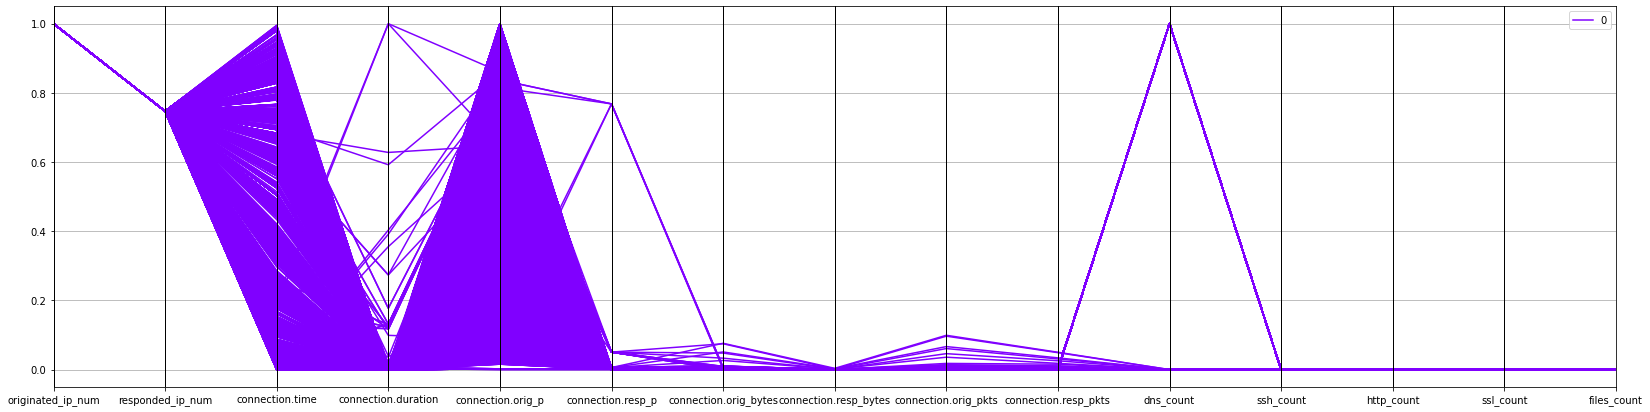

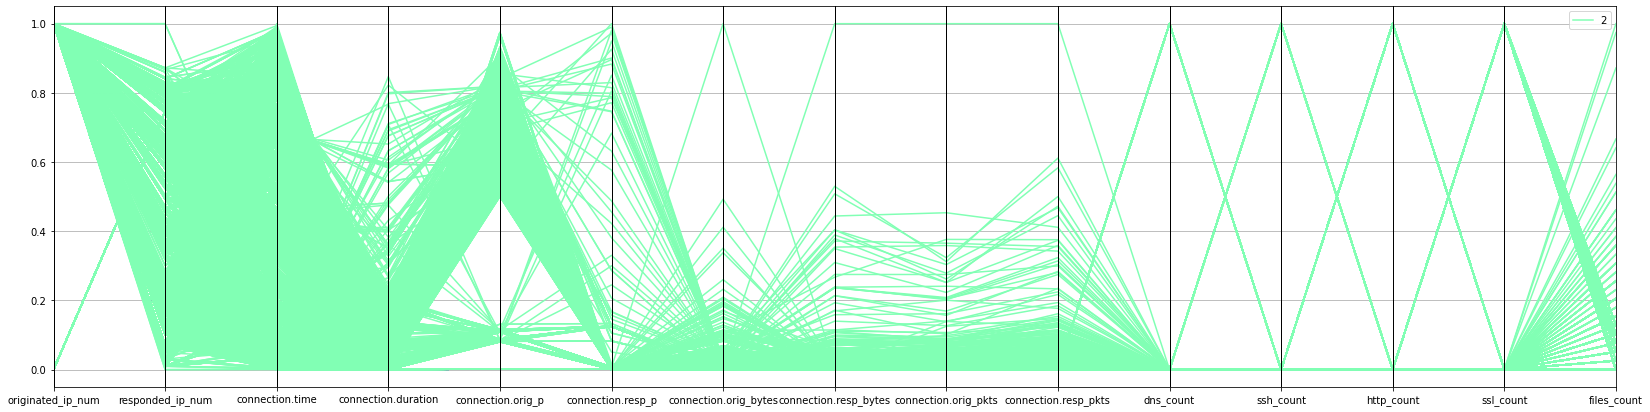

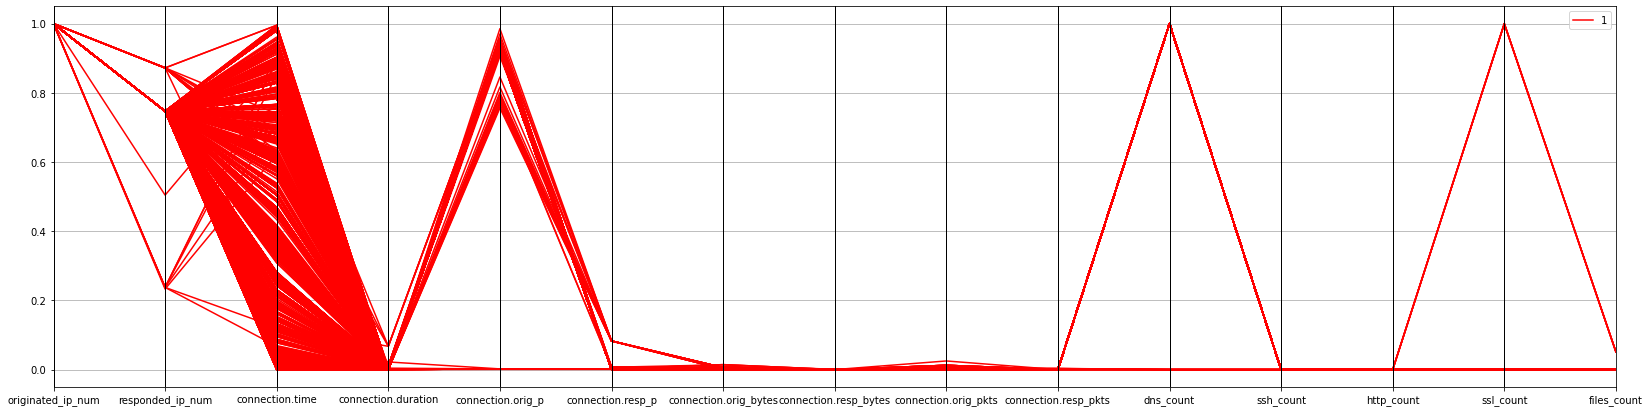

In [51]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

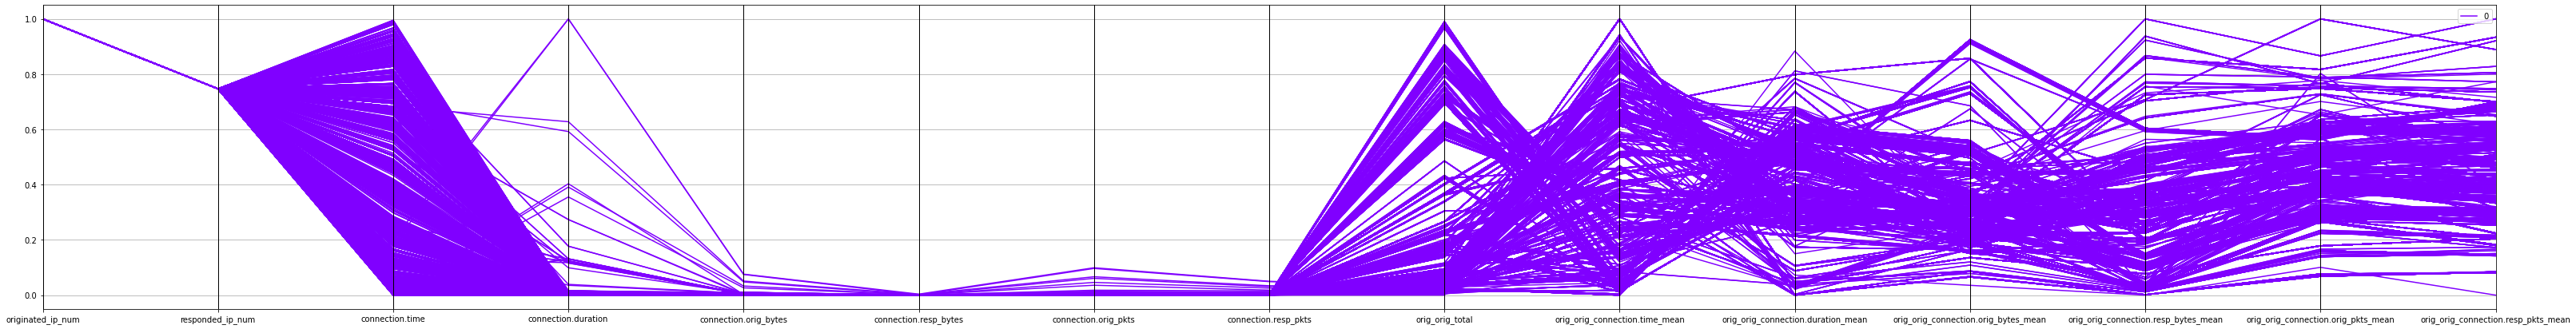

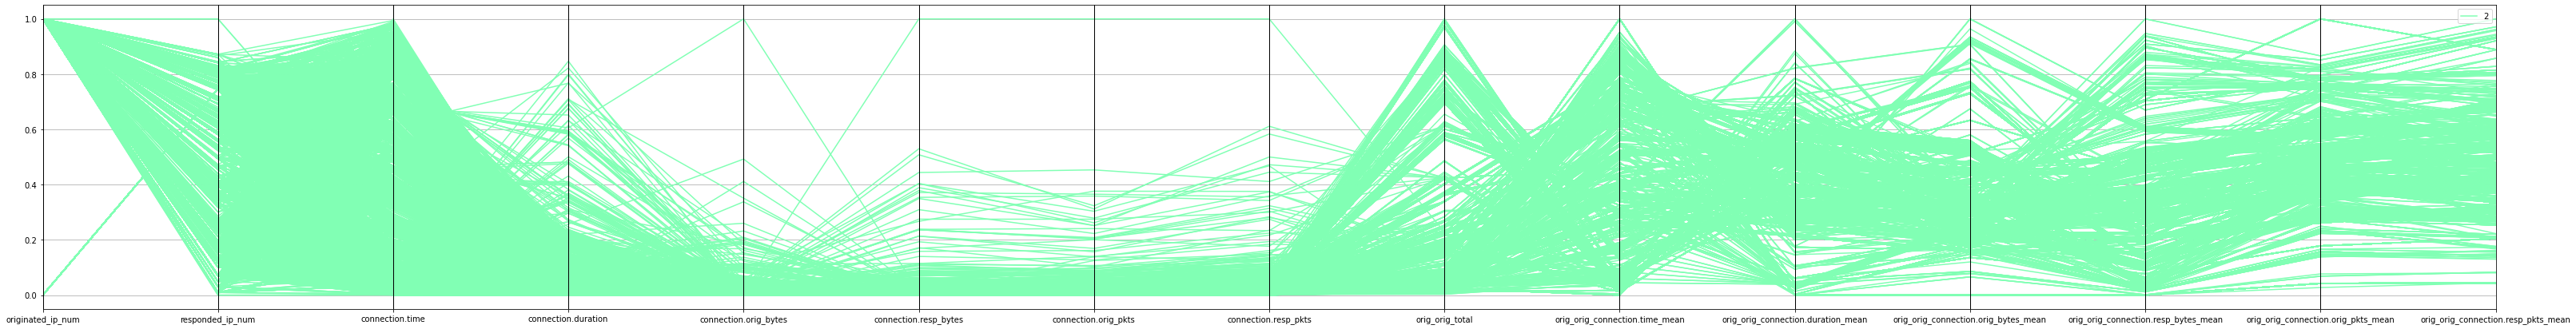

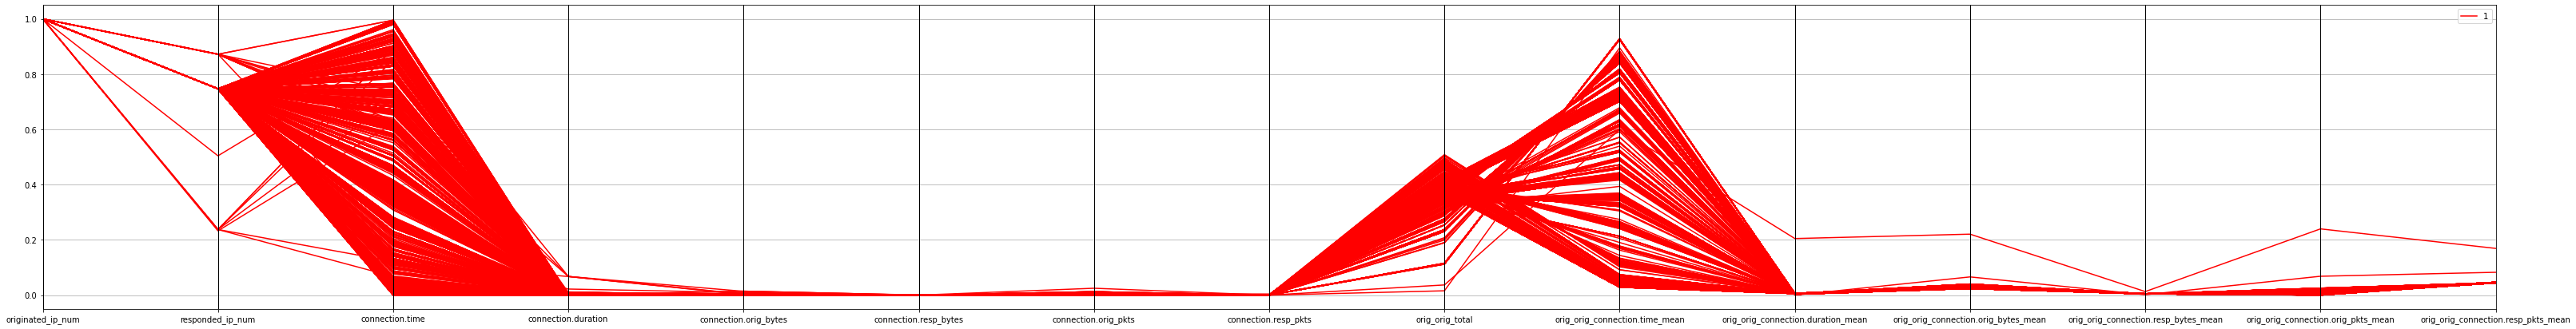

In [52]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()